# Decision Tree Classification

# Import libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import tree

# Import data

In [5]:
# Read dataset
df = pd.read_csv('Loans_Dataset.csv')
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


# Preprocessing

## Get required data

In [8]:
# Data Cleaning
df.drop_duplicates()
df.isnull().sum()

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64

In [9]:
# Get required data
df.drop(columns = ['house_number'], inplace=True)
df.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,yes
1,205,10016,395,13660,yes
2,257,10129,109,13746,yes
3,246,10064,324,13771,yes
4,117,10115,496,13822,yes


## Describe

In [11]:
# Describe data
df.describe()

,initial_payment,last_payment,credit_score,sum
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,17744.012948
std,115.844218,1442.134231,259.681745,9594.659715
min,100.000000,10005.000000,100.000000,13515.000000
25%,195.750000,11213.500000,302.750000,16081.250000
50%,290.000000,12467.000000,518.000000,17383.000000
75%,398.000000,13690.000000,755.000000,18608.250000
max,500.000000,14999.000000,997.000000,246789.000000


## Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

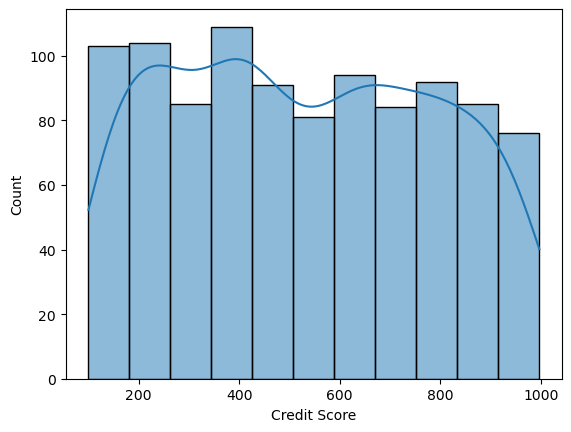

In [13]:
# Credit score distribution
sns.histplot(data=df, x='credit_score', kde=True)
plt.xlabel('Credit Score')
plt.show

## Label encoding

In [15]:
# Label encoding
le = LabelEncoder()
df['result']= le.fit_transform(df['result'])
df.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,1
1,205,10016,395,13660,1
2,257,10129,109,13746,1
3,246,10064,324,13771,1
4,117,10115,496,13822,1


## Correlation matrix

In [17]:
# Correlation matrix
df.corr()

,initial_payment,last_payment,credit_score,sum,result
initial_payment,1.000000,-0.013536,-0.009421,0.050698,-0.048464
last_payment,-0.013536,1.000000,-0.000805,0.213237,-0.805640
credit_score,-0.009421,-0.000805,1.000000,0.068387,-0.076326
sum,0.050698,0.213237,0.068387,1.000000,-0.092830
result,-0.048464,-0.805640,-0.076326,-0.092830,1.000000


<Axes: >

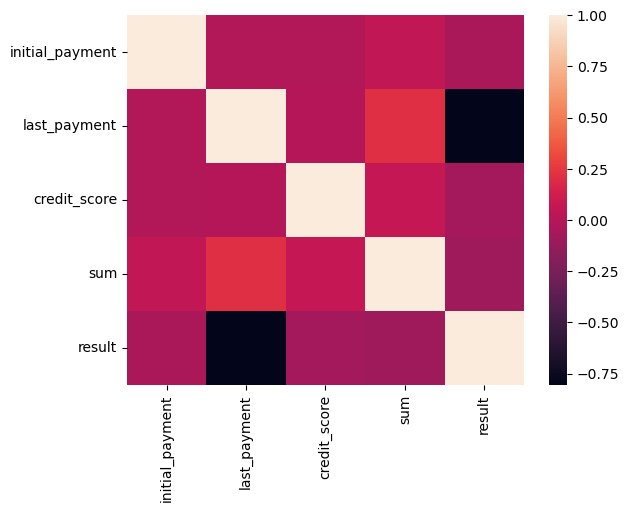

In [18]:
sns.heatmap(df.corr())

## Drop insignificant data

In [20]:
# Drop initial_payment column
df.drop(columns=['initial_payment'], inplace=True)

## Relationship

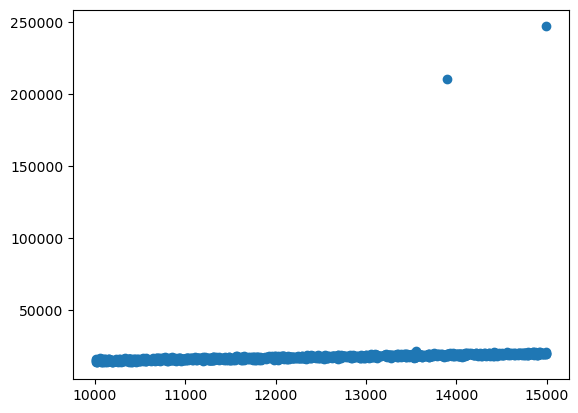

In [22]:
# Relationship between last_payment and sum
plt.scatter(df['last_payment'], df['sum'])

In [23]:
# Check who has higher correlation with result
df[['last_payment', 'sum', 'result']].corr()

,last_payment,sum,result
last_payment,1.000000,0.213237,-0.80564
sum,0.213237,1.000000,-0.09283
result,-0.805640,-0.092830,1.00000


In [24]:
# Drop one of the column that's highly correlated with another one, keep the one more correlated to the result
df.drop(columns=['last_payment'], inplace=True)
df.head()

,credit_score,sum,result
0,250,13515,1
1,395,13660,1
2,109,13746,1
3,324,13771,1
4,496,13822,1


# Split data

## Independent/Dependent variables

In [27]:
# Split data into independent/dependent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Train/Test sets

In [29]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

# Feature scaling

In [31]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model

In [33]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=4, min_samples_leaf=5)
classifier.fit(X_train, y_train);

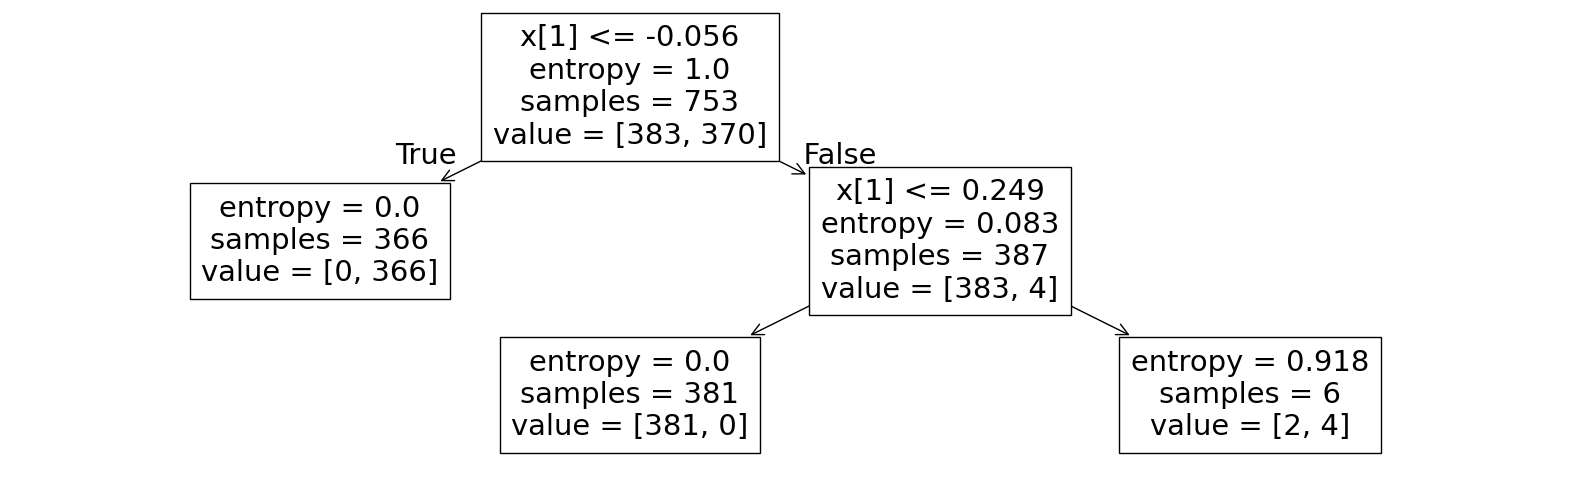

In [34]:
# Display the tree
plt.figure(figsize=(20,6))
tree.plot_tree(classifier)
plt.show()

# Predict result / Score model

In [36]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

# Evaluate model

## Accuracy

In [39]:
# Accuracy
accuracy_score(y_test, y_pred)

1.0

## Classification report

In [41]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       113

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251



## F1 score

In [43]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 1.0


## Confusion matrix

<Axes: >

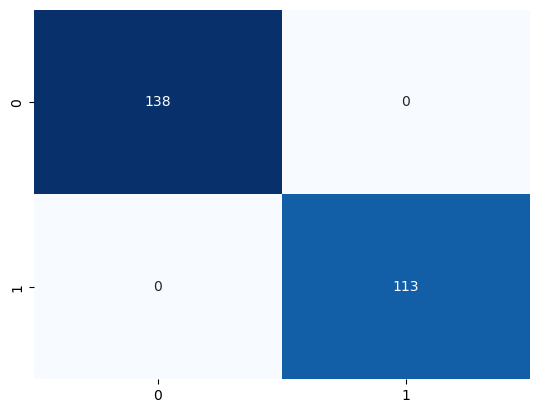

In [45]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Check example

In [47]:
# Predict purchase with Credit_score(30) and Sum(87000)
print(classifier.predict(sc.transform([[360, 14400]])))

[1]
